# Evaluación de Modelos
Comparación de métricas, matriz de confusión y curva ROC.


🔍 Evaluando modelo: Svm
              precision    recall  f1-score   support

        fake       0.83      0.66      0.73       108
        real       0.71      0.86      0.78       107

    accuracy                           0.76       215
   macro avg       0.77      0.76      0.76       215
weighted avg       0.77      0.76      0.76       215



<Figure size 1000x800 with 0 Axes>

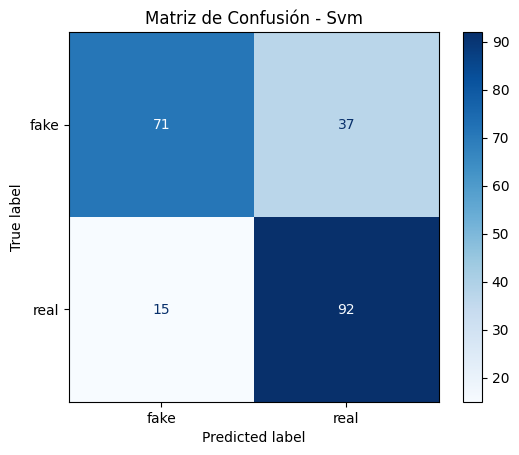


🔍 Evaluando modelo: Naive Bayes
              precision    recall  f1-score   support

        fake       0.85      0.75      0.80       108
        real       0.78      0.87      0.82       107

    accuracy                           0.81       215
   macro avg       0.81      0.81      0.81       215
weighted avg       0.81      0.81      0.81       215



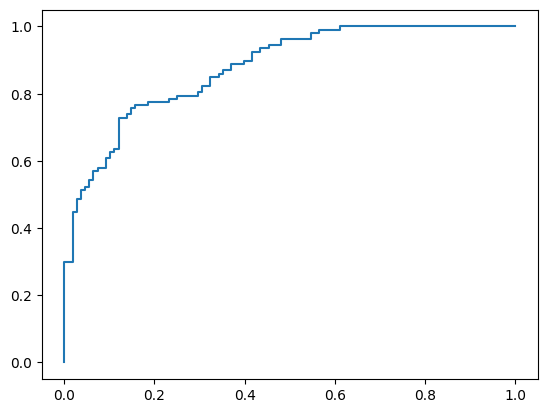

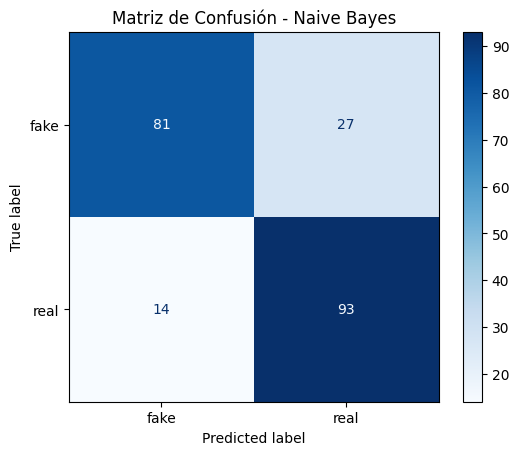


🔍 Evaluando modelo: Logistic Regression
              precision    recall  f1-score   support

        fake       0.85      0.70      0.77       108
        real       0.75      0.88      0.81       107

    accuracy                           0.79       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.79      0.79       215



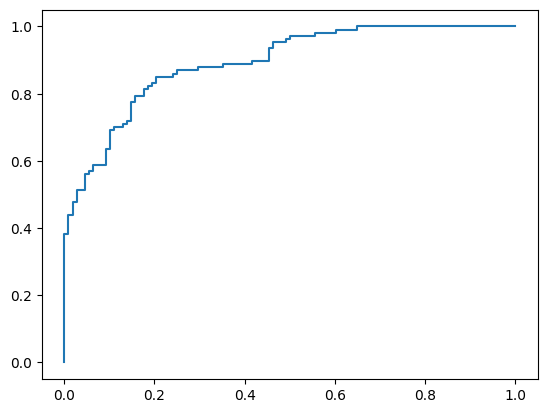

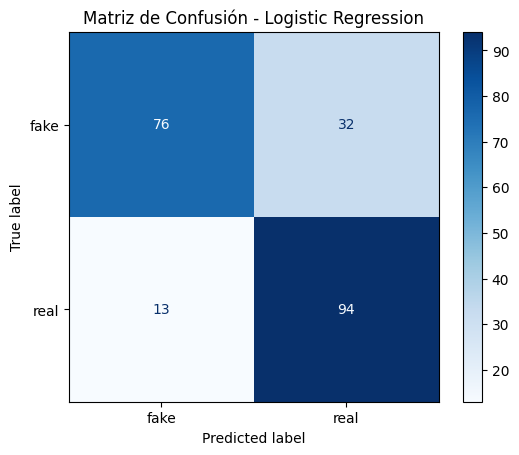


🔍 Evaluando modelo: Decision Tree
              precision    recall  f1-score   support

        fake       0.76      0.64      0.69       108
        real       0.69      0.79      0.74       107

    accuracy                           0.72       215
   macro avg       0.72      0.72      0.71       215
weighted avg       0.72      0.72      0.71       215



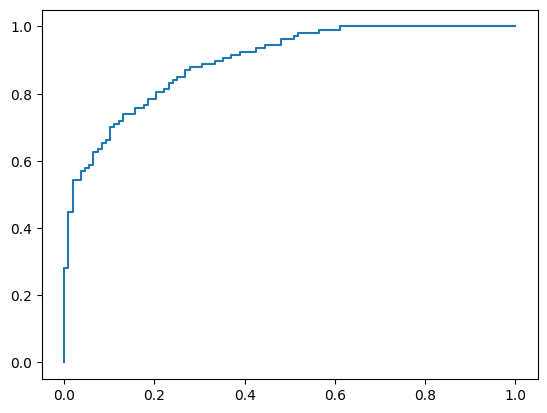

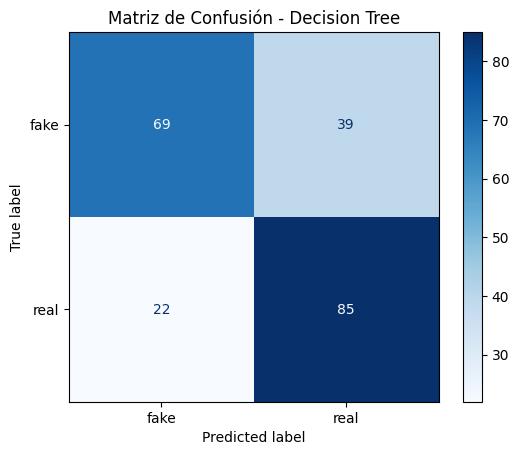


🔍 Evaluando modelo: Random Forest
              precision    recall  f1-score   support

        fake       0.87      0.84      0.85       108
        real       0.85      0.87      0.86       107

    accuracy                           0.86       215
   macro avg       0.86      0.86      0.86       215
weighted avg       0.86      0.86      0.86       215



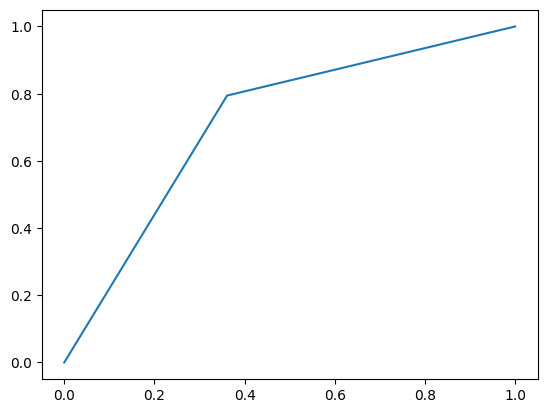

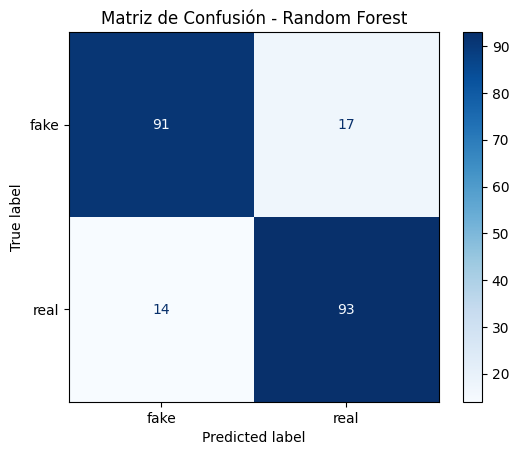


🔍 Evaluando modelo: Mlp
              precision    recall  f1-score   support

        fake       0.82      0.73      0.77       108
        real       0.76      0.84      0.80       107

    accuracy                           0.79       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.79      0.79      0.79       215



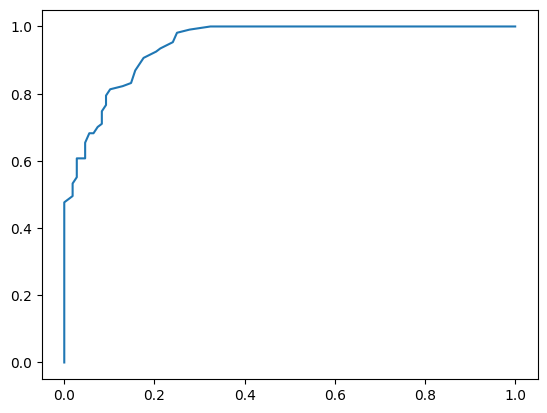

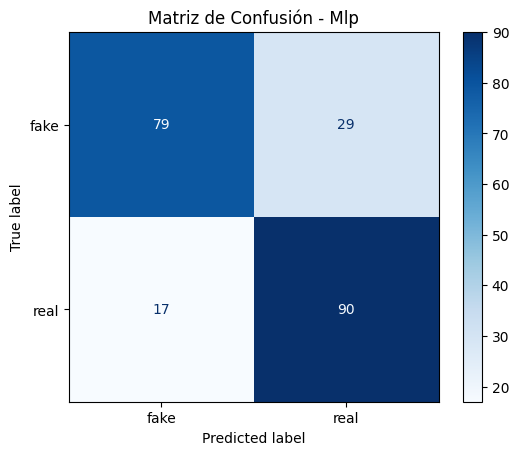

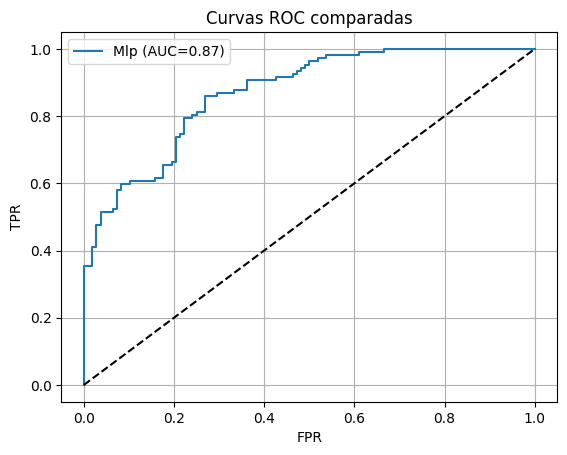


📊 Validación cruzada (5-fold) F1 ponderado:
Svm                    F1: 0.758 ± 0.039
Naive Bayes            F1: 0.766 ± 0.037
Logistic Regression    F1: 0.771 ± 0.036
Decision Tree          F1: 0.767 ± 0.043
Random Forest          F1: 0.802 ± 0.049
Mlp                    F1: 0.769 ± 0.036


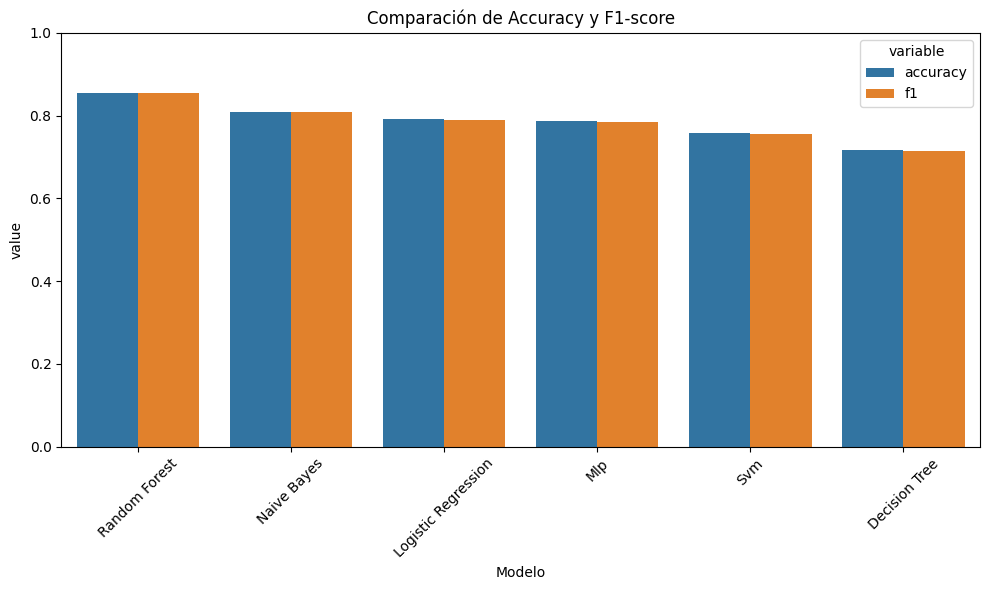

In [1]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    classification_report, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)
from sklearn.model_selection import cross_val_score

# 1. Cargar datos
X_train, y_train = joblib.load('../data/split/train.pkl')
X_test, y_test = joblib.load('../data/split/test.pkl')

# 2. Nombres de modelos
nombres_modelos = [
    'svm', 'naive_bayes', 'logistic_regression',
    'decision_tree', 'random_forest', 'mlp'
]

# 3. Evaluación
resultados = {}
plt.figure(figsize=(10, 8))

for nombre_archivo in nombres_modelos:
    modelo = joblib.load(f'../models/{nombre_archivo}.pkl')
    nombre = nombre_archivo.replace('_', ' ').title()

    print(f"\n🔍 Evaluando modelo: {nombre}")
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, 'predict_proba') else None

    print(classification_report(y_test, y_pred, target_names=['fake', 'real']))

    resultados[nombre] = {
        'accuracy': modelo.score(X_test, y_test),
        'f1': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    }

    # Matriz de confusión
    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, display_labels=['fake', 'real'], cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()

    # Curva ROC
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{nombre} (AUC={auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curvas ROC comparadas')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

# 4. Validación cruzada
print("\n📊 Validación cruzada (5-fold) F1 ponderado:")
for nombre_archivo in nombres_modelos:
    modelo = joblib.load(f'../models/{nombre_archivo}.pkl')
    nombre = nombre_archivo.replace('_', ' ').title()
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"{nombre:<22} F1: {scores.mean():.3f} ± {scores.std():.3f}")

# 5. Gráfico comparativo (F1 y Accuracy)
df_resultados = pd.DataFrame(resultados).T.reset_index().rename(columns={'index': 'Modelo'})
df_resultados = df_resultados.sort_values('f1', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados.melt(id_vars='Modelo', value_vars=['accuracy', 'f1']),
            x='Modelo', y='value', hue='variable')
plt.title('Comparación de Accuracy y F1-score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()